# Visualizing Pathway Changes Across the Progression of Cancer

## Load the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
ctl_s1_miEAA = pd.read_csv('./ctl_s1/ctl_s1_miEAA.csv')
ctl_s1_gc = pd.read_csv('./ctl_s1/ctl_s1_gc.csv')

In [ ]:
s1_s2_miEAA = pd.read_csv('./s1_s2/s1_s2_mieAA.csv')
s1_s2_gc = pd.read_csv('./s1_s2/s1_s2_gc.csv')

In [ ]:
s2_s3_miEAA = pd.read_csv('./s2_s3/s2_s3_miEAA.csv')
s2_s3_gc = pd.read_csv('./s2_s3/s2_s3-genecards.csv')

In [ ]:
s3_s4_miEAA = pd.read_csv('./s3_s4/s3_s4_miEAA.csv')
s3_s4_gc = pd.read_csv('./s3_s4/s3_s4_gc.csv')

In [ ]:
ctl_s1_miEAA.columns

In [ ]:
ctl_s1_gc.columns

In [ ]:
# Define a function to process miEAA data
def process_miEAA_data(df, stage):
    df['Stage'] = stage
    return df[['Subcategory', 'P-adjusted', 'Stage']]

# Define a function to process GeneCards data
def process_gc_data(df, stage):
    df['Stage'] = stage
    return df[['SuperPath Name', 'Score', 'Stage']]

In [ ]:
# Process the data
ctl_s1_miEAA_processed = process_miEAA_data(ctl_s1_miEAA, 'Control vs Stage 1')
s1_s2_miEAA_processed = process_miEAA_data(s1_s2_miEAA, 'Stage 1 vs Stage 2')
s2_s3_miEAA_processed = process_miEAA_data(s2_s3_miEAA, 'Stage 2 vs Stage 3')
s3_s4_miEAA_processed = process_miEAA_data(s3_s4_miEAA, 'Stage 3 vs Stage 4')

ctl_s1_gc_processed = process_gc_data(ctl_s1_gc, 'Control vs Stage 1')
s1_s2_gc_processed = process_gc_data(s1_s2_gc, 'Stage 1 vs Stage 2')
s2_s3_gc_processed = process_gc_data(s2_s3_gc, 'Stage 2 vs Stage 3')
s3_s4_gc_processed = process_gc_data(s3_s4_gc, 'Stage 3 vs Stage 4')

In [ ]:
# Combine the data
miEAA_combined = pd.concat([ctl_s1_miEAA_processed, s1_s2_miEAA_processed, s2_s3_miEAA_processed, s3_s4_miEAA_processed])
gc_combined = pd.concat([ctl_s1_gc_processed, s1_s2_gc_processed, s2_s3_gc_processed, s3_s4_gc_processed])

In [ ]:
# Aggregate duplicate entries by taking the mean of P-adjusted values
miEAA_combined_agg = miEAA_combined.groupby(['Subcategory', 'Stage']).mean().reset_index()

# Pivot the aggregated data
miEAA_combined_pivot = miEAA_combined_agg.pivot(index='Subcategory', columns='Stage', values='P-adjusted')

# Calculate the log fold change in P-adjusted values for each pathway
miEAA_combined_pivot['LogChange'] = miEAA_combined_pivot.apply(lambda row: np.log2(row.max() / row.min() + 1), axis=1)

# Filter pathways based on a log fold change threshold
log_change_threshold = 2.0  # Adjust the threshold value as needed
significant_miEAA = miEAA_combined_pivot[miEAA_combined_pivot['LogChange'] > log_change_threshold].reset_index()

# Melt the filtered dataframe back to long format for plotting
significant_miEAA_melted = significant_miEAA.melt(id_vars=['Subcategory', 'LogChange'], value_vars=['Control vs Stage 1', 'Stage 1 vs Stage 2', 'Stage 2 vs Stage 3', 'Stage 3 vs Stage 4'], var_name='Stage', value_name='P-adjusted')

# Plot the significantly changing miEAA data
plt.figure(figsize=(15, 10))
sns.lineplot(data=significant_miEAA_melted, x='Stage', y='P-adjusted', hue='Subcategory', marker='o')
plt.title('Significantly Changing Pathways (miEAA) Across Cancer Progression')
plt.xlabel('Cancer Stages')
plt.ylabel('P-adjusted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
summary = significant_miEAA[['Subcategory', 'LogChange']].sort_values(by='LogChange', ascending=False)
summary_text = "Significant miEAA Pathways Based on Log Fold Change:\n"
for index, row in summary.iterrows():
    summary_text += f"Pathway: {row['Subcategory']}, Log Fold Change: {row['LogChange']:.2f}\n"

print(summary_text)

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seab

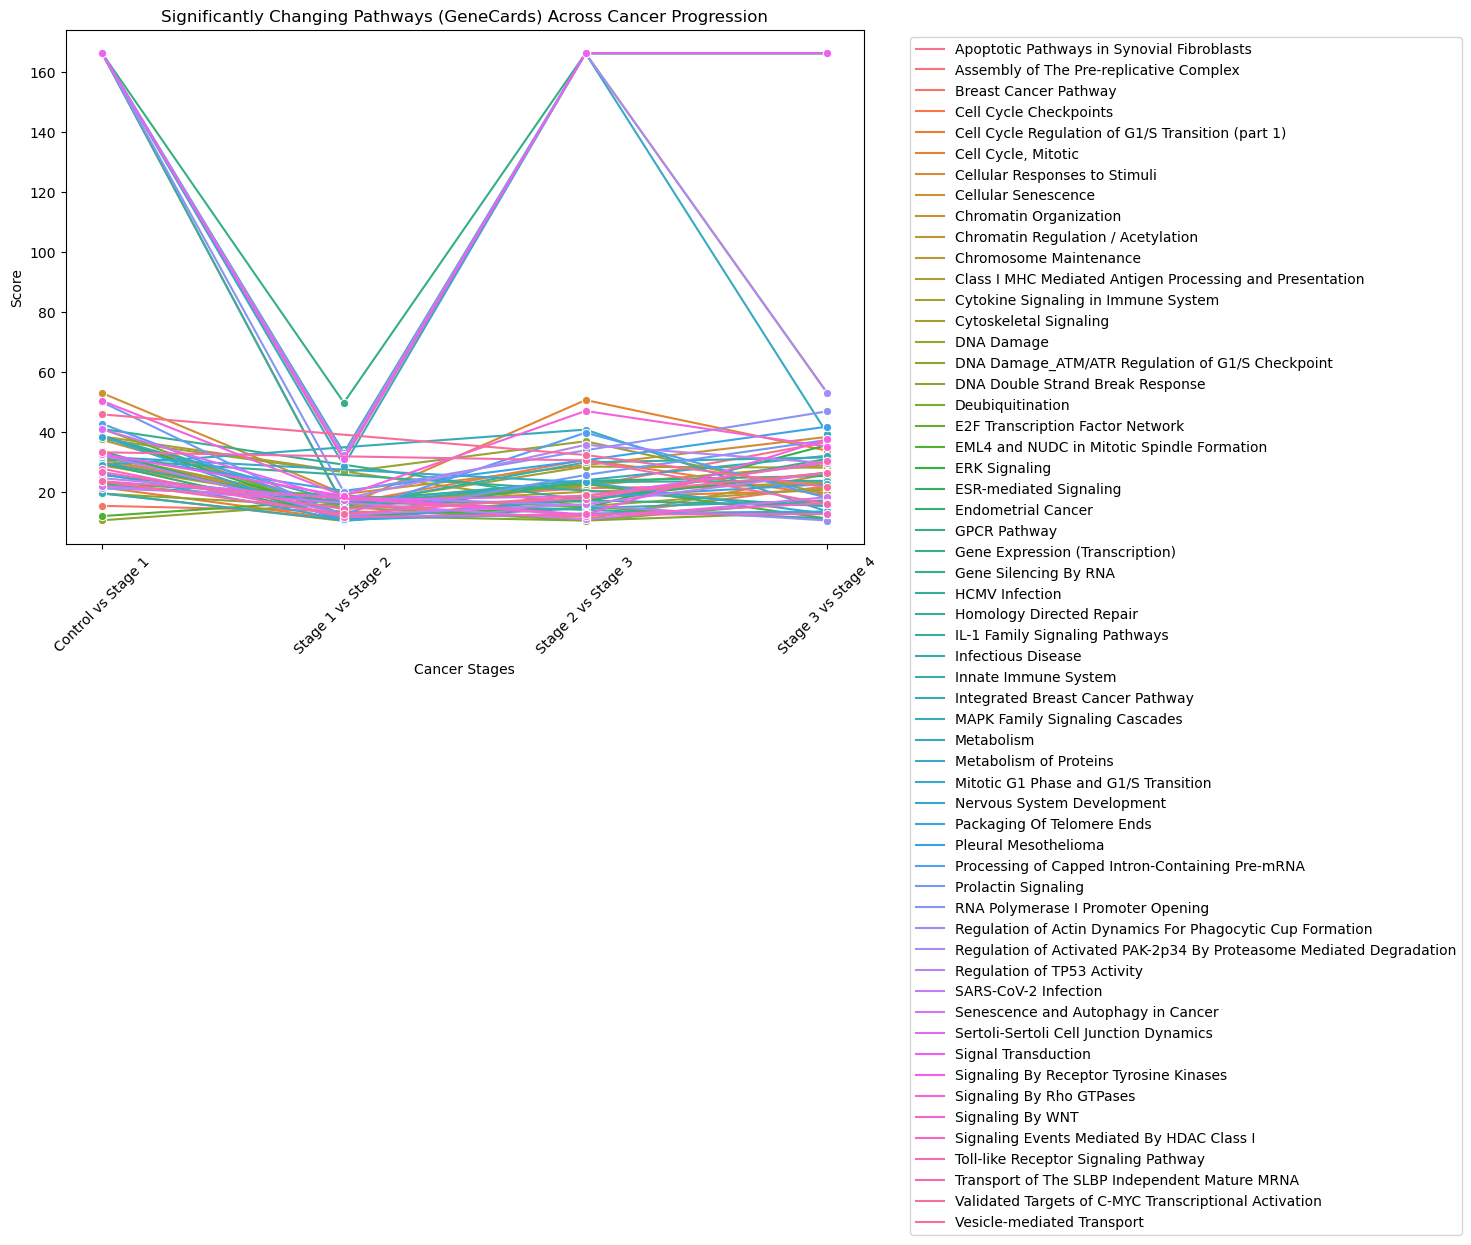

In [109]:
# Aggregate duplicate entries by taking the mean of Score values
gc_combined_agg = gc_combined.groupby(['SuperPath Name', 'Stage']).mean().reset_index()

# Pivot the aggregated data
gc_combined_pivot = gc_combined_agg.pivot(index='SuperPath Name', columns='Stage', values='Score')

# Calculate the log fold change in Score values for each pathway
gc_combined_pivot['LogChange'] = gc_combined_pivot.apply(lambda row: np.log2(row.max() / row.min() + 1), axis=1)

# Filter pathways based on a log fold change threshold
log_change_threshold = 1.5  # Adjust the threshold value as needed
significant_gc = gc_combined_pivot[gc_combined_pivot['LogChange'] > log_change_threshold].reset_index()

# Melt the filtered dataframe back to long format for plotting
significant_gc_melted = significant_gc.melt(id_vars=['SuperPath Name', 'LogChange'], value_vars=['Control vs Stage 1', 'Stage 1 vs Stage 2', 'Stage 2 vs Stage 3', 'Stage 3 vs Stage 4'], var_name='Stage', value_name='Score')

# Plot the significantly changing GeneCards data
plt.figure(figsize=(15, 10))
sns.lineplot(data=significant_gc_melted, x='Stage', y='Score', hue='SuperPath Name', marker='o')
plt.title('Significantly Changing Pathways (GeneCards) Across Cancer Progression')
plt.xlabel('Cancer Stages')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [110]:
summary_gc = significant_gc[['SuperPath Name', 'LogChange']].sort_values(by='LogChange', ascending=False)
summary_gc_text = "Significant GeneCards Pathways Based on Log Fold Change (GeneCards):\n"
for index, row in summary_gc.iterrows():
    summary_gc_text += f"Pathway: {row['SuperPath Name']}, Log Fold Change: {row['LogChange']:.2f}\n"

print(summary_gc_text)

Significant GeneCards Pathways Based on Log Fold Change (GeneCards):
Pathway: Cell Cycle, Mitotic, Log Fold Change: 3.56
Pathway: Innate Immune System, Log Fold Change: 3.56
Pathway: RNA Polymerase I Promoter Opening, Log Fold Change: 3.21
Pathway: Metabolism of Proteins, Log Fold Change: 2.75
Pathway: Cellular Responses to Stimuli, Log Fold Change: 2.68
Pathway: Signal Transduction, Log Fold Change: 2.66
Pathway: Regulation of Activated PAK-2p34 By Proteasome Mediated Degradation, Log Fold Change: 2.61
Pathway: Infectious Disease, Log Fold Change: 2.59
Pathway: Prolactin Signaling, Log Fold Change: 2.45
Pathway: Deubiquitination, Log Fold Change: 2.29
Pathway: Nervous System Development, Log Fold Change: 2.23
Pathway: Processing of Capped Intron-Containing Pre-mRNA, Log Fold Change: 2.14
Pathway: Gene Expression (Transcription), Log Fold Change: 2.12
Pathway: ERK Signaling, Log Fold Change: 2.05
Pathway: ESR-mediated Signaling, Log Fold Change: 2.02
Pathway: Metabolism, Log Fold Chang